In [2]:
!pip install catboost
!pip install shap

import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, RandomUnderSampler
from sklearn.preprocessing import OrdinalEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import randint
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import PowerTransformer

from imblearn.combine import SMOTETomek
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, ParameterSampler
import joblib
import sklearn
import xgboost as xgb

import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import scipy
import sklearn
import xgboost
import imblearn
import joblib

   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.5 MB 1.3 MB/s eta 0:01:20
   ---------------------------------------- 0.5/102.5 MB 1.3 MB/s eta 0:01:20
   ---------------------------------------- 1.0/102.5 MB 1.4 MB/s eta 0:01:15
    --------------------------------------- 1.3/102.5 MB 1.5 MB/s eta 0:01:08
    --------------------------------------- 1.8/102.5 MB 1.7 MB/s eta 0:01:01
    --------------------------------------- 2.1/102.5 MB 1.8 MB/s eta 0:00:57
    --------------------------------------- 2.4/102.5 MB 1.7 MB/s eta 0:01:01
   - -------------------------------------- 2.6/102.5 MB 1.5 MB/s eta 0:01:06
   - -------------------------------------- 3.1/102.5 MB 1.6 MB/s eta 0:01:02
   - -------------------------------------- 3.9/102.5 MB 1.8 MB/s eta 0:00:56
   - -------------------------------------- 4.2/102.5 MB 1.7 MB/s eta 0:00:58



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/544.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/544.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/544.3 kB ? eta -:--:--
   ---------------------------------------- 544.3/544.3 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.7 MB 2.1 MB/s eta 0:00:01
   ------------------- -------------------- 1.3/2.7 MB 2.0 MB/s eta 0:00:01
   ------------------- -------------------- 1.3/2.7 MB 2.0 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.7 MB 1.4 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.7 MB 1.4 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.7 MB 1.4 MB/s eta 0:00:01
   ---------------------- ----------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\Doni\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'xgboost'

In [3]:
df = pd.read_csv("anxiety_data.csv")

In [ ]:
def anxiety_category(score):
    if score <= 3:
        return 'Low'
    elif score <= 6:
        return 'Medium'
    else:
        return 'High'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10),Social Interaction Frequency (per weeks)
0,29,Female,Artist,6.0,2.7,181,10,10,114,14,1.811709,2.0,9.644064,5,2.0
1,46,Other,Nurse,6.2,5.7,200,8,1,62,23,2.375923,1.0,9.498480,3,9.0
2,64,Male,Other,5.0,3.7,117,4,1,91,28,1.930594,2.0,9.076737,1,3.0
3,20,Female,Scientist,5.8,2.8,360,6,4,86,17,1.674170,3.0,9.076733,2,NaN
4,49,Female,Other,8.2,2.3,247,4,1,98,19,1.661352,1.0,10.000000,1,2.0


In [ ]:
df.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10),Social Interaction Frequency (per weeks)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,10450.000000,10450.000000,10450.000000,11000.000000,10450.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,1.594183,2.092632,9.428729,3.929364,4.745742
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,0.399087,1.142550,0.561649,2.122533,2.232565
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,7.057622,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,1.280092,1.000000,9.078606,2.000000,3.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,1.559810,2.000000,9.550762,4.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,1.858513,3.000000,9.976142,5.000000,6.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,3.192255,7.000000,10.000000,10.000000,10.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Occupation,0
Sleep Hours,0
Physical Activity (hrs/week),0
Caffeine Intake (mg/day),0
Alcohol Consumption (drinks/week),0
Stress Level (1-10),0
Heart Rate (bpm),0
Breathing Rate (breaths/min),0


In [ ]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Age                                         0.0
Gender                                      0.0
Occupation                                  0.0
Sleep Hours                                 0.0
Physical Activity (hrs/week)                0.0
Caffeine Intake (mg/day)                    0.0
Alcohol Consumption (drinks/week)           0.0
Stress Level (1-10)                         0.0
Heart Rate (bpm)                            0.0
Breathing Rate (breaths/min)                0.0
Sweating Level (1-5)                        5.0
Therapy Sessions (per month)                5.0
Diet Quality (1-10)                         5.0
Anxiety Level (1-10)                        0.0
Social Interaction Frequency (per weeks)    5.0
dtype: float64


# **Data Preprocessing**

### Categorical Encoding

In [ ]:
print("Unique values in 'Gender':")
print(df['Gender'].unique())

print("\nUnique values in 'Occupation':")
print(df['Occupation'].unique())

Unique values in 'Gender':
['Female' 'Other' 'Male']

Unique values in 'Occupation':
['Artist' 'Nurse' 'Other' 'Scientist' 'Lawyer' 'Teacher' 'Doctor'
 'Musician' 'Student' 'Engineer' 'Freelancer' 'Chef' 'Athlete']


In [ ]:
df['Gender'] = df['Gender'].map({"Male": 0, "Female": 1, "Other": 2})
df['Occupation'] = df['Occupation'].map({"Artist": 0, "Nurse": 1, "Scientist": 2,
                                         "Lawyer": 3, "Teacher": 4, "Doctor": 5,
                                         "Musician": 6, "Student": 7, "Engineer": 8,
                                         "Freelancer": 9, "Chef": 10, "Athlete":11,
                                         "Other": 12
                                         })

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Occupation,0
Sleep Hours,0
Physical Activity (hrs/week),0
Caffeine Intake (mg/day),0
Alcohol Consumption (drinks/week),0
Stress Level (1-10),0
Heart Rate (bpm),0
Breathing Rate (breaths/min),0


In [ ]:
# Feature Engineering

df['Stress_Caffeine_Interaction'] = df['Stress Level (1-10)'] * df['Caffeine Intake (mg/day)']
df['Sleep_Activity_Balance'] = df['Sleep Hours'] * df['Physical Activity (hrs/week)']
df['Therapy_Stress_Ratio'] = df['Therapy Sessions (per month)'] / (df['Stress Level (1-10)'] + 1)
df['Overall_Lifestyle_Score'] = (
    df['Diet Quality (1-10)'] +
    df['Physical Activity (hrs/week)'] +
    df['Social Interaction Frequency (per weeks)']
) / 3
df['Physiological_Response_Index'] = (
    df['Heart Rate (bpm)'] +
    df['Breathing Rate (breaths/min)'] +
    df['Sweating Level (1-5)']
) / 3

df['Caffeine_Intake_log'] = np.log1p(df['Caffeine Intake (mg/day)'])
df['Alcohol_Consumption_log'] = np.log1p(df['Alcohol Consumption (drinks/week)'])
df['Therapy_Sessions_log'] = np.log1p(df['Therapy Sessions (per month)'])
df['Stress_x_Sleep_Hours'] = df['Stress Level (1-10)'] * df['Sleep Hours']
df['Stress_x_Diet_Quality'] = df['Stress Level (1-10)'] * df['Diet Quality (1-10)']

df['Alcohol_x_Sleep_Hours'] = df['Alcohol Consumption (drinks/week)'] * df['Sleep Hours']

/tmp/ipython-input-13-1035022995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stress_Caffeine_Interaction'] = df['Stress Level (1-10)'] * df['Caffeine Intake (mg/day)']
/tmp/ipython-input-13-1035022995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sleep_Activity_Balance'] = df['Sleep Hours'] * df['Physical Activity (hrs/week)']
/tmp/ipython-input-13-1035022995.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

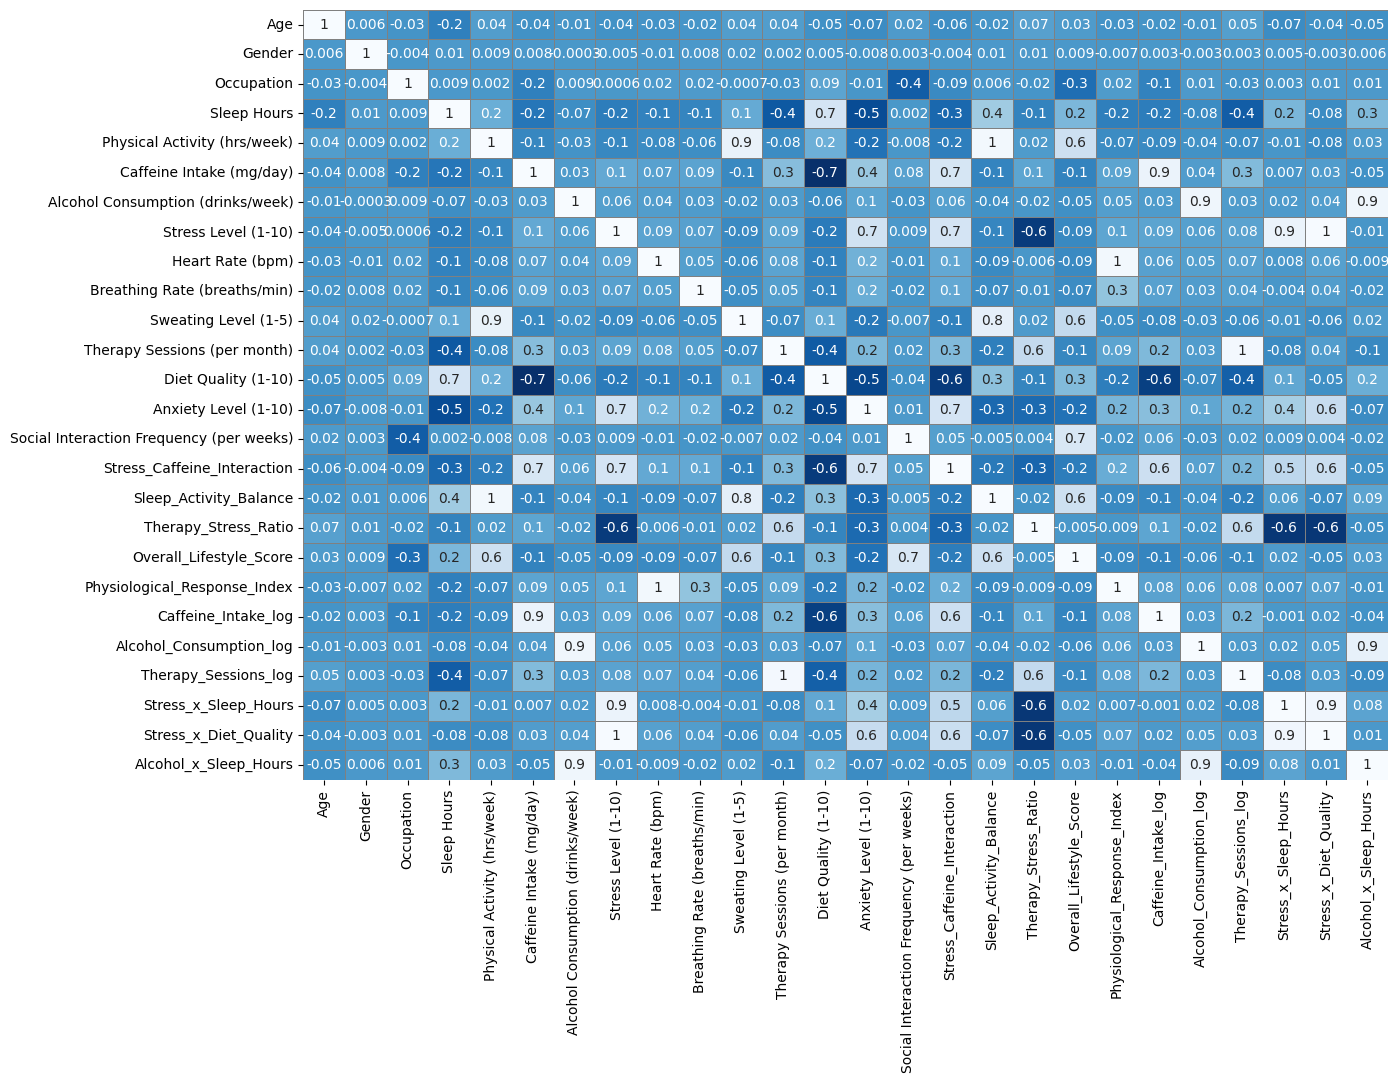

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey');

### Remove Outliers

In [ ]:
def handle_outliers_iqr_iterative_mean_imputation(df_input, columns, max_iterations=10, tolerance=0):
    df_output = df_input.copy()
    for col in columns:
        if col not in df_output.columns:
            print(f"Warning: Column '{col}' not found in DataFrame. Skipping.")
            continue

        for _ in range(max_iterations):
            Q1 = df_output[col].quantile(0.25)
            Q3 = df_output[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers_exist = (df_output[col] < lower_bound).any() or (df_output[col] > upper_bound).any()

            if not outliers_exist:
                break

            imputation_value = df_output[col][(df_output[col] >= lower_bound) & (df_output[col] <= upper_bound)].mean()
            df_output[col] = np.where(df_output[col] > upper_bound, imputation_value, df_output[col])
            df_output[col] = np.where(df_output[col] < lower_bound, imputation_value, df_output[col])
    return df_output

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

columns_for_outlier_handling = numeric_cols

# --- Function to Count Outliers ---
def count_outliers_iqr(df_input, columns):
    outlier_counts = {}
    for col in columns:
        if col not in df_input.columns:
            outlier_counts[col] = "Column Not Found"
            continue

        Q1 = df_input[col].quantile(0.25)
        Q3 = df_input[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        count = df_input[(df_input[col] < lower_bound) | (df_input[col] > upper_bound)].shape[0]
        outlier_counts[col] = count
    return outlier_counts

### Execution and Results

print("--- Number of Outliers BEFORE Mean Imputation ---")
outliers_before = count_outliers_iqr(df, columns_for_outlier_handling)
for col, count in outliers_before.items():
    print(f"'{col}': {count} outliers")
print("-" * 50 + "\n")

df_cleaned_imputed_mean = handle_outliers_iqr_iterative_mean_imputation(df.copy(), columns_for_outlier_handling)

df_for_modeling = df_cleaned_imputed_mean

print("--- Number of Outliers AFTER Mean Imputation ---")
outliers_after = count_outliers_iqr(df_for_modeling, columns_for_outlier_handling)
for col, count in outliers_after.items():
    print(f"'{col}': {count} outliers")
print("-" * 50)

--- Number of Outliers BEFORE Mean Imputation ---
'Age': 0 outliers
'Gender': 0 outliers
'Occupation': 0 outliers
'Sleep Hours': 89 outliers
'Physical Activity (hrs/week)': 48 outliers
'Caffeine Intake (mg/day)': 0 outliers
'Alcohol Consumption (drinks/week)': 0 outliers
'Stress Level (1-10)': 0 outliers
'Heart Rate (bpm)': 0 outliers
'Breathing Rate (breaths/min)': 0 outliers
'Sweating Level (1-5)': 49 outliers
'Therapy Sessions (per month)': 1 outliers
'Diet Quality (1-10)': 48 outliers
'Anxiety Level (1-10)': 257 outliers
'Social Interaction Frequency (per weeks)': 0 outliers
'Stress_Caffeine_Interaction': 117 outliers
'Sleep_Activity_Balance': 81 outliers
'Therapy_Stress_Ratio': 858 outliers
'Overall_Lifestyle_Score': 49 outliers
'Physiological_Response_Index': 0 outliers
'Caffeine_Intake_log': 211 outliers
'Alcohol_Consumption_log': 425 outliers
'Therapy_Sessions_log': 0 outliers
'Stress_x_Sleep_Hours': 0 outliers
'Stress_x_Diet_Quality': 0 outliers
'Alcohol_x_Sleep_Hours': 2 outl

### Data Transformation

In [ ]:
columns_to_transform = ['Age', 'Gender', 'Occupation',
            'Sleep Hours', 'Physical Activity (hrs/week)',
            'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
            'Stress Level (1-10)', 'Heart Rate (bpm)', 'Breathing Rate (breaths/min)',
            'Sweating Level (1-5)', 'Therapy Sessions (per month)',
            'Diet Quality (1-10)', 'Social Interaction Frequency (per weeks)', 'Stress_Caffeine_Interaction',
            'Sleep_Activity_Balance', 'Therapy_Stress_Ratio', 'Overall_Lifestyle_Score',
            'Physiological_Response_Index', 'Caffeine_Intake_log', 'Alcohol_Consumption_log',
            'Therapy_Sessions_log', 'Stress_x_Sleep_Hours', 'Stress_x_Diet_Quality',
            'Alcohol_x_Sleep_Hours'
                        ]


In [ ]:
pt = PowerTransformer(method='yeo-johnson')
df_transformed = df_for_modeling.copy()
df_transformed[columns_to_transform] = pt.fit_transform(df[columns_to_transform])

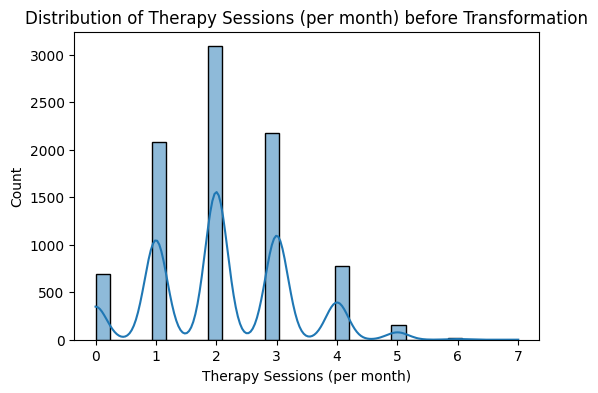

In [ ]:
for col in ['Therapy Sessions (per month)']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col} before Transformation')
    plt.show()

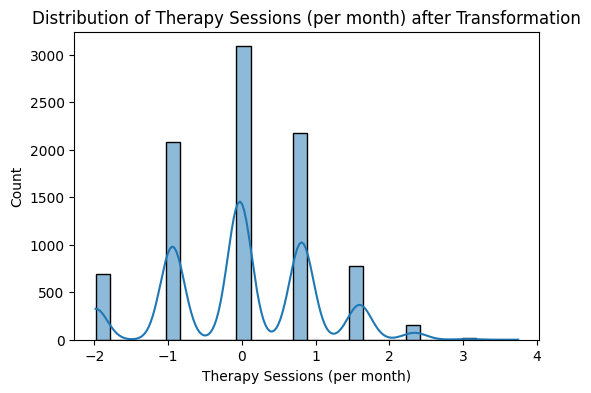

In [ ]:
for col in ['Therapy Sessions (per month)']:
    plt.figure(figsize=(6,4))
    sns.histplot(df_transformed[col], bins=30, kde=True)
    plt.title(f'Distribution of {col} after Transformation')
    plt.show()

In [ ]:
df.to_csv(r'preprocessed_data.csv', index=False)

# **Data Modelling**

In [ ]:
df_transformed['AnxietyLevel'] = df_transformed['Anxiety Level (1-10)'].apply(anxiety_category)

encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df_transformed['AnxietyLevel'] = encoder.fit_transform(df_transformed[['AnxietyLevel']])

# 1. Select features
# features = [
#             'Sleep Hours', 'Physical Activity (hrs/week)',
#             'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
#             'Stress Level (1-10)', 'Heart Rate (bpm)', 'Breathing Rate (breaths/min)',
#             'Sweating Level (1-5)', 'Therapy Sessions (per month)',
#             'Diet Quality (1-10)', 'Social Interaction Frequency (per weeks)', 'Stress_Caffeine_Interaction',
#             'Sleep_Activity_Balance', 'Therapy_Stress_Ratio', 'Overall_Lifestyle_Score',
#             'Physiological_Response_Index', 'Caffeine_Intake_log', 'Alcohol_Consumption_log',
#             'Therapy_Sessions_log', 'Stress_x_Sleep_Hours', 'Stress_x_Diet_Quality',
#             'Alcohol_x_Sleep_Hours'
#             ]

features = ['Age', 'Gender', 'Occupation',
            'Sleep Hours', 'Physical Activity (hrs/week)',
            'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
            'Stress Level (1-10)', 'Heart Rate (bpm)', 'Breathing Rate (breaths/min)',
            'Sweating Level (1-5)', 'Therapy Sessions (per month)',
            'Diet Quality (1-10)', 'Social Interaction Frequency (per weeks)', 'Stress_Caffeine_Interaction',
            'Sleep_Activity_Balance', 'Therapy_Stress_Ratio', 'Overall_Lifestyle_Score',
            'Physiological_Response_Index', 'Caffeine_Intake_log', 'Alcohol_Consumption_log',
            'Therapy_Sessions_log', 'Stress_x_Sleep_Hours', 'Stress_x_Diet_Quality',
            'Alcohol_x_Sleep_Hours'
            ]

X = df_transformed[features]
y = df_transformed['AnxietyLevel']

In [ ]:
df_transformed.corr(numeric_only=True)['Anxiety Level (1-10)'].sort_values(ascending=False)

,Anxiety Level (1-10)
Anxiety Level (1-10),1.000000
AnxietyLevel,0.903086
Stress Level (1-10),0.661986
Stress_Caffeine_Interaction,0.625487
Stress_x_Diet_Quality,0.608703
Stress_x_Sleep_Hours,0.481479
Caffeine Intake (mg/day),0.284424
Caffeine_Intake_log,0.283219
Therapy Sessions (per month),0.202443
Therapy_Sessions_log,0.200317


In [ ]:
# print(df_transformed['Therapy Sessions (per month)'].value_counts())
# print(df_transformed['Therapy Sessions (per month)'].nunique())
# print(df_transformed['Therapy Sessions (per month)'].isnull().sum())

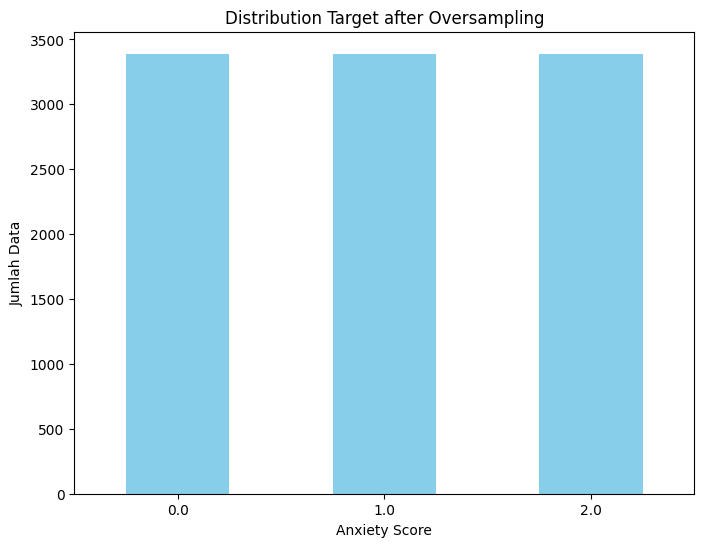

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train_over, y_train_over = SMOTE(random_state=42, k_neighbors=3).fit_resample(X_train, y_train)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)


df_resampled = pd.DataFrame(X_train_over, columns=features)
df_resampled['AnxietyLevel'] = y_train_over

df_resampled['AnxietyLevel'].value_counts().sort_index().plot(
    kind='bar', color='skyblue', figsize=(8, 6)
)
plt.title("Distribution Target after Oversampling")
plt.xlabel("Anxiety Score")
plt.ylabel("Jumlah Data")
plt.xticks(rotation=0)
plt.show()


### Model Comparison

In [ ]:
print("\n--- Training Random Forest Model with Manual Parameters ---")

weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_over), y=y_train_over)
class_weights_dict = dict(zip(np.unique(y_train_over), weights))

rf_model_manual = RandomForestClassifier(
    n_estimators=400,
    max_depth=7,
    min_samples_split=40,
    min_samples_leaf=15,
    max_features='log2',
    class_weight=class_weights_dict,
    random_state=42,
    n_jobs=-1
)

# Training model
rf_model_manual.fit(X_train_scaled, y_train_over)
print("Random Forest model trained successfully with manual parameters.")

# --- Evaluasi Model di Test Set ---
print("\n--- Evaluation on Test Set (Manual RF Model) ---")
y_pred_rf_manual = rf_model_manual.predict(X_test_scaled)

print("Random Forest Classification Report (Test):\n", classification_report(y_test, y_pred_rf_manual))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_pred_rf_manual))
print("F1 Macro Score (Test):", f1_score(y_test, y_pred_rf_manual, average='macro'))

# --- Evaluasi Model di Train Set ---
print("\n--- Evaluation on Train Set (Manual RF Model) ---")
y_train_pred_rf_manual = rf_model_manual.predict(X_train_scaled)

print("Random Forest Classification Report (Train):\n", classification_report(y_train_over, y_train_pred_rf_manual))
print("Train Confusion Matrix:\n", confusion_matrix(y_train_over, y_train_pred_rf_manual))
print("Train F1 Macro Score:", f1_score(y_train_over, y_train_pred_rf_manual, average='macro'))

# --- Cross-validation pada keseluruhan dataset (opsional) ---
print("\n--- Cross-validation on Full Dataset (for general robustness check) ---")
try:
    X_scaled_for_cv = scaler.fit_transform(X)
    scores_cv = cross_val_score(rf_model_manual, X_scaled_for_cv, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='f1_macro', n_jobs=-1)
    print(f"Individual F1 Macro scores across folds: {scores_cv}")
    print(f"Mean F1 Macro score from 5-fold CV: {scores_cv.mean():.4f}")
except Exception as e:
    print(f"Error during cross-validation: {e}")
    print("Ensure 'X' and 'y' are in the correct format for cross_val_score.")



--- Training Random Forest Model with Manual Parameters ---
Random Forest model trained successfully with manual parameters.

--- Evaluation on Test Set (Manual RF Model) ---
Random Forest Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       848
         1.0       0.71      0.70      0.71       814
         2.0       0.61      0.74      0.67       135

    accuracy                           0.74      1797
   macro avg       0.70      0.74      0.72      1797
weighted avg       0.74      0.74      0.74      1797

Confusion Matrix (Test):
 [[649 199   0]
 [176 573  65]
 [  0  35 100]]
F1 Macro Score (Test): 0.7164964785060857

--- Evaluation on Train Set (Manual RF Model) ---
Random Forest Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.81      0.78      0.80      3390
         1.0       0.70      0.75      0.73      3390
         2.0       0.93 

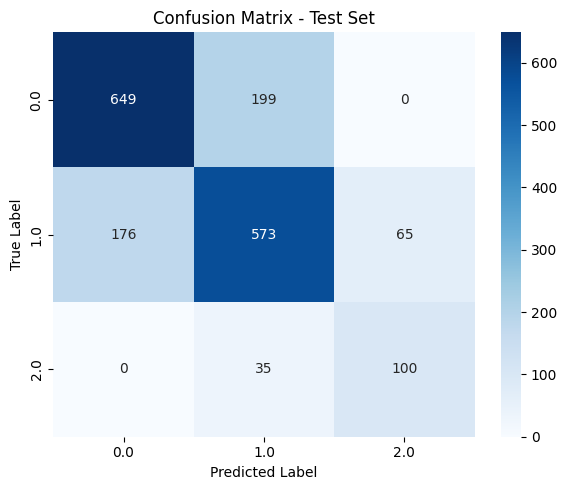


--------------------------------------------------



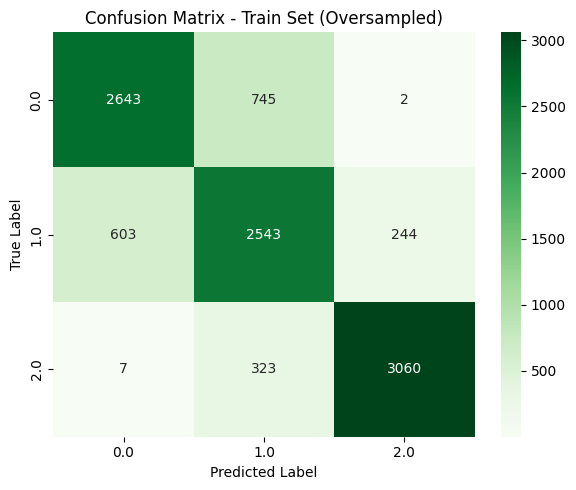

In [ ]:
# --- Confusion Matrix - Test Set ---
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_manual),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

print("\n" + "-"*50 + "\n")

# --- Confusion Matrix - Train Set (Oversampled) ---
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_train_over, y_train_pred_rf_manual),
            annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Train Set (Oversampled)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [ ]:
# --- Model XGBoost with Stronger Regularization ---
print("\n--- Training XGBoost Model with Stronger Regularization ---")


xgb_model_reg = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    n_estimators=150,
    learning_rate=0.03,
    max_depth=4,
    min_child_weight=5,
    gamma=0.2,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.005,
    reg_lambda=1,
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=1
)

# Training model
xgb_model_reg.fit(X_train_scaled, y_train_over)
print("XGBoost model with stronger regularization trained successfully.")

# --- Evaluation Model di Test Set ---
print("\n--- Evaluation on Test Set (Regularized XGBoost Model) ---")
y_pred_xgb_reg = xgb_model_reg.predict(X_test_scaled)

print("XGBoost Classification Report (Test):\n", classification_report(y_test, y_pred_xgb_reg))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_pred_xgb_reg))
print("F1 Macro Score (Test):", f1_score(y_test, y_pred_xgb_reg, average='macro'))

# --- Evaluation Model di Train Set ---
print("\n--- Evaluation on Train Set (Regularized XGBoost Model) ---")
y_train_pred_xgb_reg = xgb_model_reg.predict(X_train_scaled)

print("XGBoost Classification Report (Train):\n", classification_report(y_train_over, y_train_pred_xgb_reg))
print("Train Confusion Matrix:\n", confusion_matrix(y_train_over, y_train_pred_xgb_reg))
print("Train F1 Macro Score:", f1_score(y_train_over, y_train_pred_xgb_reg, average='macro'))

# --- Cross-validation pada keseluruhan dataset (opsional) ---
print("\n--- Cross-validation on Full Dataset (Regularized XGBoost) ---")
try:
    if 'scaler' not in locals():
        scaler = StandardScaler()
    X_scaled_for_cv_reg = scaler.fit_transform(X)
    scores_cv_xgb_reg = cross_val_score(xgb_model_reg, X_scaled_for_cv_reg, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='f1_macro', n_jobs=-1)
    print(f"Individual F1 Macro scores across folds (Regularized XGBoost): {scores_cv_xgb_reg}")
    print(f"Mean F1 Macro score from 5-fold CV (Regularized XGBoost): {scores_cv_xgb_reg.mean():.4f}")
except Exception as e:
    print(f"Error during cross-validation for Regularized XGBoost: {e}")
    print("Ensure 'X' and 'y' are in the correct format for cross_val_score and 'scaler' is defined.")


--- Training XGBoost Model with Stronger Regularization ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:02:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost model with stronger regularization trained successfully.

--- Evaluation on Test Set (Regularized XGBoost Model) ---
XGBoost Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.77      0.78      0.78       848
         1.0       0.71      0.69      0.70       814
         2.0       0.61      0.73      0.67       135

    accuracy                           0.73      1797
   macro avg       0.70      0.73      0.71      1797
weighted avg       0.73      0.73      0.73      1797

Confusion Matrix (Test):
 [[660 188   0]
 [193 558  63]
 [  0  36  99]]
F1 Macro Score (Test): 0.7139762987716204

--- Evaluation on Train Set (Regularized XGBoost Model) ---
XGBoost Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      3390
         1.0       0.73      0.74      0.73      3390
         2.0       0.93      0.94      0.93      3390

    accuracy          

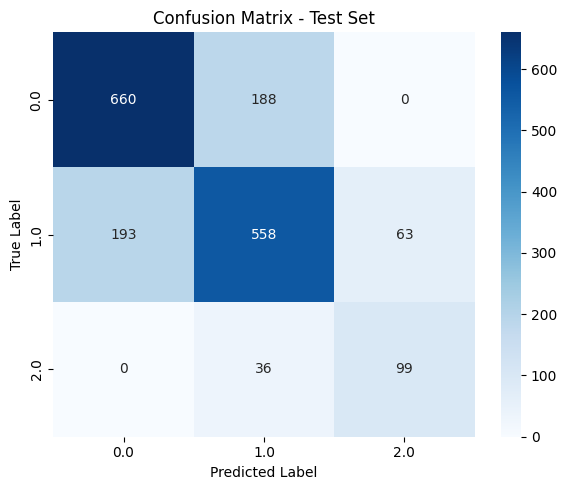


--------------------------------------------------



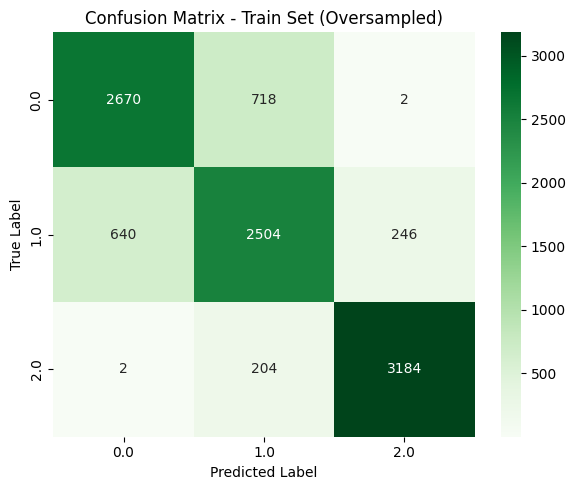

In [ ]:
# --- Confusion Matrix - Test Set ---
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_reg),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

print("\n" + "-"*50 + "\n")

# --- Confusion Matrix - Train Set (Oversampled) ---
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_train_over, y_train_pred_xgb_reg),
            annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Train Set (Oversampled)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [ ]:
# Model SVC

weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_over), y=y_train_over)
class_weights_dict = dict(zip(np.unique(y_train_over), weights))

svc_model = SVC(
    probability=True,
    kernel='rbf',
    C=1,
    gamma=0.1,
    class_weight=class_weights_dict,
    random_state=42
)

# Training
svc_model.fit(X_train_scaled, y_train_over)

# Predict test set
y_pred_svc = svc_model.predict(X_test_scaled)

# Evaluation on test set
print("SVC Classification Report (Test):\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_pred_svc))
print("F1 Macro Score (Test):", f1_score(y_test, y_pred_svc, average='macro'))

# Predict train set
y_train_pred_svc = svc_model.predict(X_train_scaled)

# Evaluation on train set
print("\nSVC Classification Report (Train):\n", classification_report(y_train_over, y_train_pred_svc))
print("Train Confusion Matrix:\n", confusion_matrix(y_train_over, y_train_pred_svc))
print("Train F1 Macro Score:", f1_score(y_train_over, y_train_pred_svc, average='macro'))


# --- Cross-validation pada keseluruhan dataset (opsional) ---
print("\n--- Cross-validation on Full Dataset (SVC) ---")
try:
    if 'scaler' not in locals():
        scaler = StandardScaler()
    X_scaled_for_cv_reg = scaler.fit_transform(X)
    scores_cv_svc = cross_val_score(svc_model, X_scaled_for_cv_reg, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='f1_macro', n_jobs=-1)
    print(f"Individual F1 Macro scores across folds (SVC): {scores_cv_svc}")
    print(f"Mean F1 Macro score from 5-fold CV (SVC): {scores_cv_svc.mean():.4f}")
except Exception as e:
    print(f"Error during cross-validation for SVC: {e}")
    print("Ensure 'X' and 'y' are in the correct format for cross_val_score and 'scaler' is defined.")

SVC Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.78      0.78      0.78       848
         1.0       0.71      0.68      0.70       814
         2.0       0.58      0.76      0.66       135

    accuracy                           0.73      1797
   macro avg       0.69      0.74      0.71      1797
weighted avg       0.73      0.73      0.73      1797

Confusion Matrix (Test):
 [[660 188   0]
 [189 551  74]
 [  0  32 103]]
F1 Macro Score (Test): 0.7111226006189098

SVC Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      3390
         1.0       0.75      0.75      0.75      3390
         2.0       0.92      0.95      0.93      3390

    accuracy                           0.83     10170
   macro avg       0.83      0.83      0.83     10170
weighted avg       0.83      0.83      0.83     10170

Train Confusion Matrix:
 [[2701  686    3]
 [ 571 25

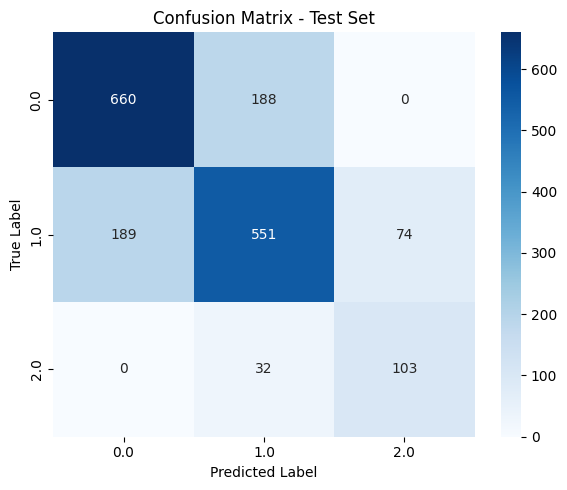


--------------------------------------------------



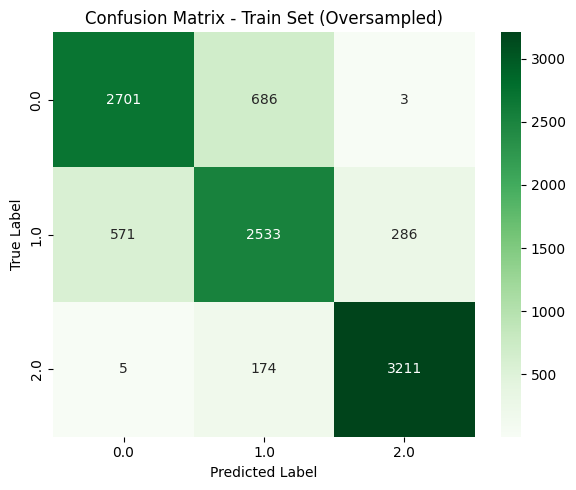

In [ ]:
# --- Confusion Matrix - Test Set ---
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_svc),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

print("\n" + "-"*50 + "\n")

# --- Confusion Matrix - Train Set (Oversampled) ---
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_train_over, y_train_pred_svc),
            annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Train Set (Oversampled)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', rf_model_manual),
     ('svc', svc_model),
    ('xgb', xgb_model_reg)
]

final_estimator = LogisticRegression(solver='liblinear', random_state=42)

stacked_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,
    n_jobs=-1
)

print("\n--- Training Stacked Model ---")

stacked_model.fit(X_train_scaled, y_train_over)
print("Stacked model trained successfully.")

# --- Evaluation of Stacked Model on Test Set ---
print("\n--- Evaluation on Test Set (Stacked Model) ---")
y_pred_stacked = stacked_model.predict(X_test_scaled)

print("Stacked Model Classification Report (Test):\n", classification_report(y_test, y_pred_stacked))
print("Stacked Model Confusion Matrix (Test):\n", confusion_matrix(y_test, y_pred_stacked))
print("Stacked Model F1 Macro Score (Test):", f1_score(y_test, y_pred_stacked, average='macro'))

# --- Evaluation of Stacked Model on Train Set ---
print("\n--- Evaluation on Train Set (Stacked Model) ---")
y_train_pred_stacked = stacked_model.predict(X_train_scaled)

print("Stacked Model Classification Report (Train):\n", classification_report(y_train_over, y_train_pred_stacked))
print("Stacked Model Train Confusion Matrix:\n", confusion_matrix(y_train_over, y_train_pred_stacked))
print("Stacked Model Train F1 Macro Score:", f1_score(y_train_over, y_train_pred_stacked, average='macro'))

# --- Cross-validation pada keseluruhan dataset (opsional) ---
print("\n--- Cross-validation on Full Dataset (Stacked) ---")
try:
    if 'scaler' not in locals():
        scaler = StandardScaler()
    X_scaled_for_cv_reg = scaler.fit_transform(X)
    scores_cv_stacked = cross_val_score(stacked_model, X_scaled_for_cv_reg, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='f1_macro', n_jobs=-1)
    print(f"Individual F1 Macro scores across folds (Stacked): {scores_cv_stacked}")
    print(f"Mean F1 Macro score from 5-fold CV (Stacked): {scores_cv_stacked.mean():.4f}")
except Exception as e:
    print(f"Error during cross-validation for Stacked: {e}")
    print("Ensure 'X' and 'y' are in the correct format for cross_val_score and 'scaler' is defined.")


--- Training Stacked Model ---
Stacked model trained successfully.

--- Evaluation on Test Set (Stacked Model) ---
Stacked Model Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.78      0.79      0.78       848
         1.0       0.72      0.68      0.70       814
         2.0       0.58      0.74      0.65       135

    accuracy                           0.74      1797
   macro avg       0.69      0.74      0.71      1797
weighted avg       0.74      0.74      0.74      1797

Stacked Model Confusion Matrix (Test):
 [[668 180   0]
 [189 554  71]
 [  0  35 100]]
Stacked Model F1 Macro Score (Test): 0.712369770885955

--- Evaluation on Train Set (Stacked Model) ---
Stacked Model Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      3390
         1.0       0.75      0.73      0.74      3390
         2.0       0.92      0.96      0.94      3390

    

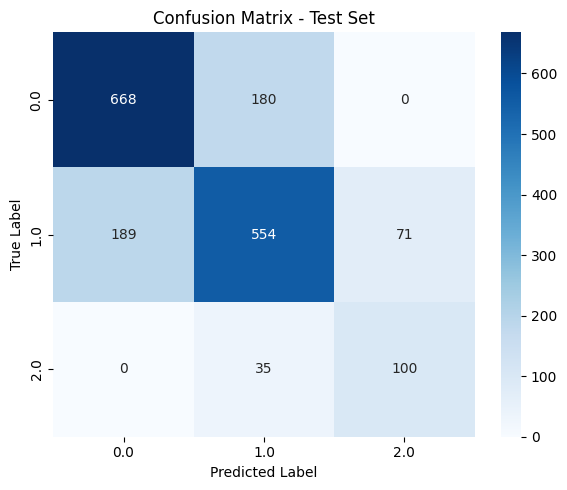


--------------------------------------------------



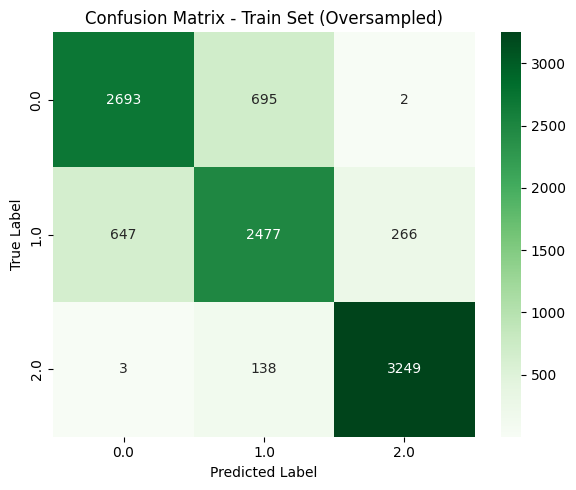

In [ ]:
# --- Confusion Matrix - Test Set ---
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_stacked),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

print("\n" + "-"*50 + "\n")

# --- Confusion Matrix - Train Set (Oversampled) ---
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_train_over, y_train_pred_stacked),
            annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Train Set (Oversampled)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

/tmp/ipython-input-33-1398536198.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=model_names, y=f1_scores_train, palette='Blues_d')


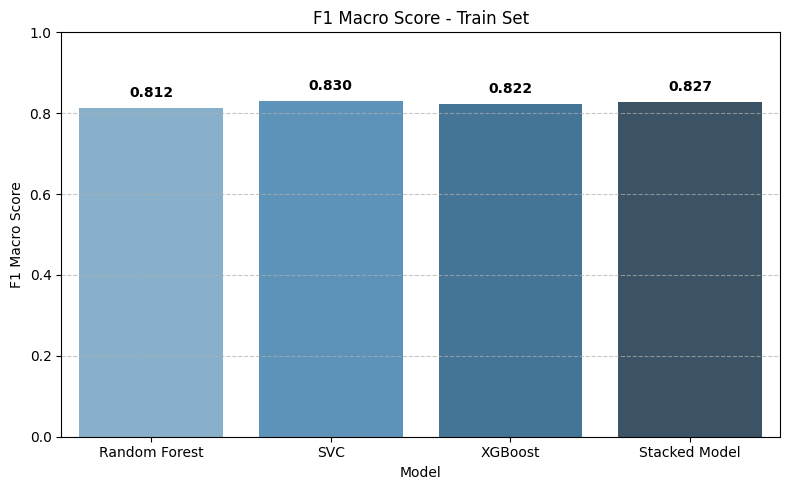

/tmp/ipython-input-33-1398536198.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=model_names, y=f1_scores_test, palette='Oranges_d')


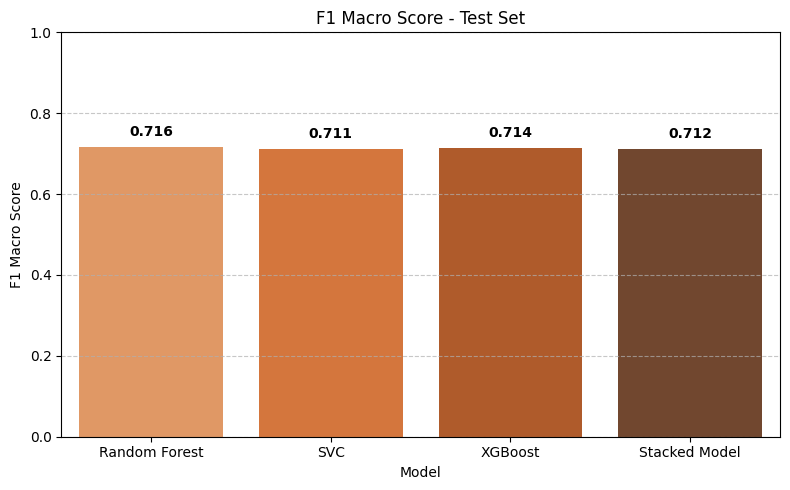

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

# --- Skor F1 Macro Score ---
model_names = ['Random Forest', 'SVC', 'XGBoost', 'Stacked Model']

f1_scores_train = [
    f1_score(y_train_over, y_train_pred_rf_manual, average='macro'),
    f1_score(y_train_over, y_train_pred_svc, average='macro'),
    f1_score(y_train_over, y_train_pred_xgb_reg, average='macro'),
    f1_score(y_train_over, y_train_pred_stacked, average='macro')
]

f1_scores_test = [
    f1_score(y_test, y_pred_rf_manual, average='macro'),
    f1_score(y_test, y_pred_svc, average='macro'),
    f1_score(y_test, y_pred_xgb_reg, average='macro'),
    f1_score(y_test, y_pred_stacked, average='macro')
]

# --- Plot untuk TRAIN set ---
plt.figure(figsize=(8, 5))
bars = sns.barplot(x=model_names, y=f1_scores_train, palette='Blues_d')
plt.ylim(0, 1)
plt.title('F1 Macro Score - Train Set')
plt.ylabel('F1 Macro Score')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label di atas setiap bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.02,
        f'{height:.3f}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

# --- Plot untuk TEST set ---
plt.figure(figsize=(8, 5))
bars = sns.barplot(x=model_names, y=f1_scores_test, palette='Oranges_d')
plt.ylim(0, 1)
plt.title('F1 Macro Score - Test Set')
plt.ylabel('F1 Macro Score')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label di atas setiap bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.02,
        f'{height:.3f}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

In [ ]:
# rf = RandomForestClassifier(
#     n_estimators=200,
#     max_depth=20,
#     min_samples_split=5,
#     min_samples_leaf=1,
#     random_state=42,
#     max_features='log2',
#     class_weight='balanced'
# )

# xgb = XGBClassifier(
#     max_depth=10,
#     learning_rate=0.05,
#     n_estimators=150,
#     subsample=0.6,
#     colsample_bytree=0.8,
#     eval_metric='mlogloss',
#     random_state=42
# )

# svc = SVC(
#     probability=True,
#     kernel='rbf',
#     C=1,
#     gamma=0.1,
#     class_weight='balanced',
#     random_state=42
# )

# base_models = [
#     ('rf', rf),
#     ('xgb', xgb),
#     ('svc', svc)
# ]

# final_estimator = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=42)

# stacked_model = StackingClassifier(
#     estimators=base_models,
#     final_estimator=final_estimator,
# )

# # Training
# stacked_model.fit(X_train_scaled, y_train_over)

# # Predict
# y_pred = stacked_model.predict(X_test_scaled)

# # Evaluation on test data
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("F1 Macro Score:", f1_score(y_test, y_pred, average='macro'))


# y_train_pred = stacked_model.predict(X_train_scaled)

# # Evaluation on training data
# print("Train Classification Report:\n", classification_report(y_train_over, y_train_pred))
# print("Train Confusion Matrix:\n", confusion_matrix(y_train_over, y_train_pred))
# print("Train F1 Macro Score:", f1_score(y_train_over, y_train_pred, average='macro'))

In [ ]:
# # Model Light Gradient

# from lightgbm import LGBMClassifier
# from sklearn.metrics import classification_report, confusion_matrix, f1_score

# # Buat model LightGBM
# lgbm_model = LGBMClassifier(
#     boosting_type='gbdt',
#     objective='multiclass',
#     num_class=3,  # jumlah kelas: Low, Medium, High
#     learning_rate=0.05,
#     n_estimators=150,
#     max_depth=10,
#     subsample=0.7,
#     colsample_bytree=0.8,
#     class_weight='balanced',
#     random_state=42
# )

# # Training
# lgbm_model.fit(X_train_scaled, y_train_over)

# # Predict test set
# y_pred_lgbm = lgbm_model.predict(X_test_scaled)

# # Evaluation on test set
# print("🔍 LightGBM Classification Report (Test):\n", classification_report(y_test, y_pred_lgbm))
# print("🧮 Confusion Matrix (Test):\n", confusion_matrix(y_test, y_pred_lgbm))
# print("🎯 F1 Macro Score (Test):", f1_score(y_test, y_pred_lgbm, average='macro'))

# # Predict train set
# y_train_pred_lgbm = lgbm_model.predict(X_train_scaled)

# # Evaluation on train set
# print("\n✅ LightGBM Classification Report (Train):\n", classification_report(y_train_over, y_train_pred_lgbm))
# print("🧮 Train Confusion Matrix:\n", confusion_matrix(y_train_over, y_train_pred_lgbm))
# print("🎯 Train F1 Macro Score:", f1_score(y_train_over, y_train_pred_lgbm, average='macro'))

# scores = cross_val_score(stacked_model, X_train_scaled, y_train_over, cv=5, scoring='f1_macro')
# print("CV F1 Macro:", scores.mean())

In [ ]:
# # Cat Boost
# from catboost import CatBoostClassifier
# from sklearn.metrics import classification_report, confusion_matrix, f1_score

# # Buat model CatBoost
# catboost_model = CatBoostClassifier(
#     iterations=150,
#     learning_rate=0.05,
#     depth=10,
#     loss_function='MultiClass',
#     eval_metric='TotalF1',
#     random_seed=42,
#     verbose=0  # matikan output training
# )

# # Training
# catboost_model.fit(X_train_scaled, y_train_over)

# # Predict test set
# y_pred_cat = catboost_model.predict(X_test_scaled)

# # Evaluation on test set
# print("🔍 CatBoost Classification Report (Test):\n", classification_report(y_test, y_pred_cat))
# print("🧮 Confusion Matrix (Test):\n", confusion_matrix(y_test, y_pred_cat))
# print("🎯 F1 Macro Score (Test):", f1_score(y_test, y_pred_cat, average='macro'))

# # Predict train set
# y_train_pred_cat = catboost_model.predict(X_train_scaled)

# # Evaluation on train set
# print("\n✅ CatBoost Classification Report (Train):\n", classification_report(y_train_over, y_train_pred_cat))
# print("🧮 Train Confusion Matrix:\n", confusion_matrix(y_train_over, y_train_pred_cat))
# print("🎯 Train F1 Macro Score:", f1_score(y_train_over, y_train_pred_cat, average='macro'))